In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import ESRGAN.RRDBNet_arch as arch

/home/imonalc/anaconda3/envs/dice/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")

In [4]:
ESRGAN_model_path = './ESRGAN/models/RRDB_ESRGAN_x4.pth'  # models/RRDB_ESRGAN_x4.pth OR models/RRDB_PSNR_x4.pth
device = torch.device('cuda')  # if you want to run on CPU, change 'cuda' -> cpu

test_img_folder = 'LR/*'

model = arch.RRDBNet(3, 3, 64, 23, gc=32)
model.load_state_dict(torch.load(ESRGAN_model_path), strict=True)
model.eval()
model = model.to(device)

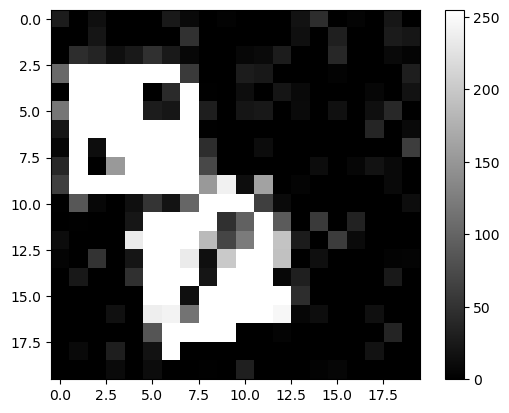

In [7]:
i = 11000
X_train_1 = X_test[i:i+1, :].reshape(20, 20)
#img = X_train_1.copy()
img = np.stack((X_train_1.copy(),)*3, axis=-1)
#img = Image.fromarray(X_train_1)
#img.save("output.png")
#img = np.array(Image.open('output.png'))
flag = 1
if flag:
    img1 = img * 1.0 / 255
    img1 = torch.from_numpy(np.transpose(img1[:, :, [2, 1, 0]], (2, 0, 1))).float()
    img_LR = img1.unsqueeze(0)
    img_LR = img_LR.to(device)
    with torch.no_grad():
        output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()
    output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output = (output * 255.0).round()
    cv2.imwrite('output_rlt.png', output)

flag2 = 0
if flag2:
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blocksize = 3
    adaptive_constant = 0
    img2 = cv2.GaussianBlur(img2,(blocksize,blocksize),adaptive_constant)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

In [75]:
img

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [42]:
img = Image.fromarray(X_train_1)

# 画像をPNGとして保存
img.save("output.png")

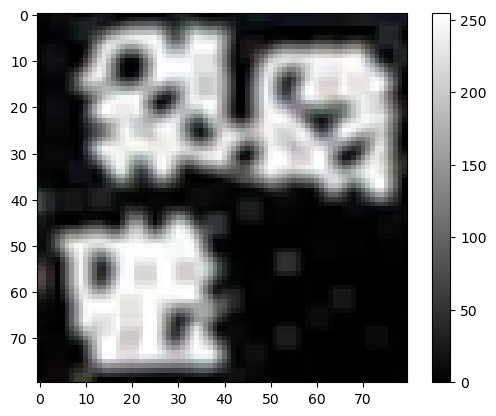

In [48]:
img = cv2.imread("output_rlt.png")
blocksize = 5
adaptive_constant = 10
img = cv2.GaussianBlur(img,(blocksize,blocksize),adaptive_constant)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

In [38]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

/home/imonalc/anaconda3/envs/dice/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytic